## The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

Analysis

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

In [1]:
# libraries

import pandas as pd
import numpy as np

In [2]:
# import datasets

cab_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
customer_df = pd.read_csv("Customer_ID.csv")
transaction_df = pd.read_csv("Transaction_ID.csv")

In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


All four files do not contain any missing values.  We may need to make some adjustments to the data types
Cab_df - transaction id (object). Converted number to date format using Excel before importing Cad_df.
city_df - population and users (numeric int64)
customer_df - Customer ID (object or string)
transaction_df - transaction ID and customer ID both object or string

The formatting for Date of Travel is not correct so I left it as is.  I did not undersand what "42377" represented. I guess it does not matter since it's just a point in time.

After these changes, let's look at the first few rows of each file. Verify that data types are correct now.

In [7]:
cab_df["Transaction ID"] = cab_df["Transaction ID"].astype(str)
city_df["Population"] = city_df["Population"].str.replace(",", "").astype(int)   #series
city_df["Users"] = city_df["Users"].str.replace(",", "").astype(int)
customer_df["Customer ID"] = customer_df["Customer ID"].astype(str)
transaction_df["Customer ID"] = transaction_df["Customer ID"].astype(str)
transaction_df["Transaction ID"] = transaction_df["Transaction ID"].astype(str)

cab_df["Date of Travel"] = pd.to_datetime("1899-12-30") + pd.to_timedelta(cab_df["Date of Travel"], unit="D")

Assistance from Co-Pilot :

If you export that column as-is, Python will read those serial numbers as regular numeric values (floats or ints), not dates. So when you look at them in Python, they’re missing all context—they’re just numbers.

🧰 How to Fix It in Python
If you've already got a column of serial numbers like 42377, you can convert them to real dates using this approach:

import pandas as pd

# Assuming 'YourColumn' has the Excel serial numbers
df["YourColumn"] = pd.to_datetime("1899-12-30") + pd.to_timedelta(df["YourColumn"], unit="D")

So if you can skip the TEXT() formula in Excel and export the raw serials instead, Python can handle the conversion smoothly.

Additional notes on date

In [8]:
cab_df["Year"] = cab_df["Date of Travel"].dt.year
cab_df["Month"] = cab_df["Date of Travel"].dt.month
cab_df["Date"] = cab_df["Date of Travel"].dt.date  # for display


In [9]:
#cab_df["Date of Travel"] = pd.to_datetime(cab_df["Date of Travel"]).dt.date

"""
This returns Python date objects, which don’t include the time part at all.

You're converting the datetime to a Python date object, which is no longer a datetime64 type that pandas recognizes for .dt operations. 
That’s why you’re getting the error when trying to use .dt afterward — it’s now just a plain object column.

Reason why 

"""

"\nThis returns Python date objects, which don’t include the time part at all.\n\nYou're converting the datetime to a Python date object, which is no longer a datetime64 type that pandas recognizes for .dt operations. \nThat’s why you’re getting the error when trying to use .dt afterward — it’s now just a plain object column.\n\nReason why \n\n"

In [10]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Date
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,2016-01-08
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,2016-01-06
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2016-01-02
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,2016-01-07
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,2016-01-03


In [11]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [12]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Understand the field names and data types
EDA - Begin with using describe() method
Identify relationships across the files
Field/feature transformations

In [14]:
cab_df.describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Year,Month
count,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,2017.045199,7.500434
min,2016-01-02 00:00:00,1.900000,15.600000,19.000000,2016.000000,1.000000
25%,2016-11-23 00:00:00,12.000000,206.437500,151.200000,2016.000000,5.000000
50%,2017-09-10 00:00:00,22.440000,386.360000,282.480000,2017.000000,8.000000
75%,2018-05-12 00:00:00,32.960000,583.660000,413.683200,2018.000000,10.000000
max,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,2018.000000,12.000000
std,NaN,12.233526,274.378911,157.993661,0.800239,3.445095


The average distance travelled per cab was 22.6 KM with an average fare of $423.44.

In [15]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In the selected 20 cities, 64521 users are taking a cab.

In [16]:
customer_df.describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


The average age of the user (of cabs) is 35 years old with an average income of $15,015.63.  The youngest is 18 years old.  The oldest is 65 years old.

In [17]:
transaction_df.describe()

,Transaction ID,Customer ID,Payment_Mode
count,440098,440098,440098
unique,440098,49171,2
top,10000011,494,Card
freq,1,54,263991


There are 440,098 unique transactaions.  There are users taking a cab more than once.

### Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship

The relationship starts with `city` field in `cab_df`. It will be joined (one to one) to the `city` field in `city_df`. Next, the `transaction id` field in `transaction_df` is joined (one to one) to `transaction_id` in `city_df`. Finally, `customer_id` in `transaction_df` is joined to `customer_id` in `customer_df`

In [18]:
step1 = pd.merge(cab_df, city_df, how = "left", on =["City", "City"])
step1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Date,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,2016-01-08,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,2016-01-06,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2016-01-02,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,2016-01-07,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,2016-01-03,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,2018-01-08,418859,127001
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,2018-01-04,418859,127001
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,2018-01-05,418859,127001
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,2018-01-05,418859,127001


In [19]:
step2 = pd.merge(step1, transaction_df, how ="left", on= ["Transaction ID", "Transaction ID"])
step2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Date,Population,Users,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,2016-01-08,814885,24701,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,2016-01-06,814885,24701,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2016-01-02,814885,24701,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,2016-01-07,814885,24701,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,2016-01-03,814885,24701,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,2018-01-08,418859,127001,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,2018-01-04,418859,127001,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,2018-01-05,418859,127001,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,2018-01-05,418859,127001,52175,Card


In [20]:
result_df = pd.merge(step2, customer_df, how = "left", on= ["Customer ID", "Customer ID"])
result_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,2016-01-08,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,2016-01-06,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2016-01-02,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,2016-01-07,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,2016-01-03,814885,24701,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,2018-01-08,418859,127001,52392,Cash,Male,24,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,2018-01-04,418859,127001,53286,Cash,Male,32,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,2018-01-05,418859,127001,52265,Cash,Male,56,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,2018-01-05,418859,127001,52175,Card,Male,32,6423


In [21]:
# double check that joins did not create null values
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  object        
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Year                359392 non-null  int32         
 8   Month               359392 non-null  int32         
 9   Date                359392 non-null  object        
 10  Population          359392 non-null  int32         
 11  Users               359392 non-null  int32         
 12  Customer ID         359392 non-null  object        
 13  Payment_Mode        359392 no

In [22]:
# check for duplicate observations. if so, then use df.drop_duplicates()

duplicates = result_df[result_df.duplicated()]
duplicates

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)


In [23]:
# check for NA values

result_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Year                  0
Month                 0
Date                  0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

# Age

There are no outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd156400e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd15674f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd15674710>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd15675490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd15675760>],
 'means': []}

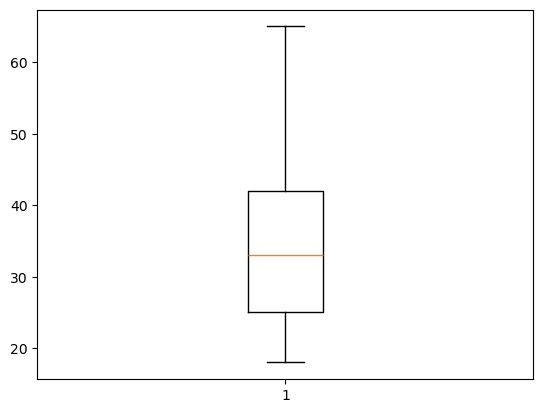

In [24]:
import matplotlib.pyplot as plt
# outliers
plt.boxplot(result_df.Age)

(array([57893., 59136., 55892., 44891., 49178., 19684., 16034., 18608.,
        19165., 18911.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

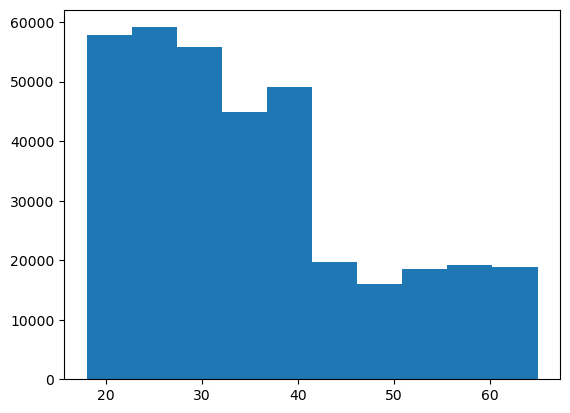

In [25]:
plt.hist(result_df.Age)

# Cost of Trip

There are no outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd184c81d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd184c8740>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd18497fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd184c8b60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd184c8f50>],
 'means': []}

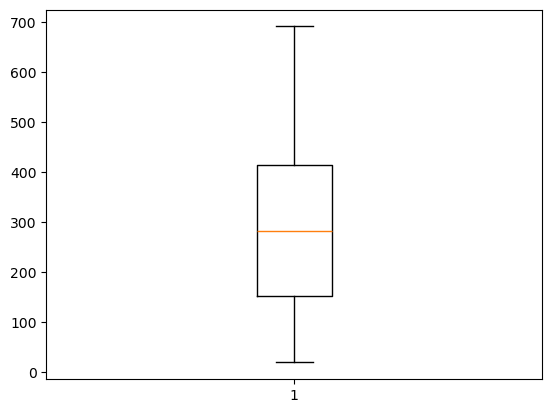

In [26]:
plt.boxplot(result_df["Cost of Trip"])

(array([45347., 46066., 46181., 45888., 46372., 45376., 41690., 28461.,
        11875.,  2136.]),
 array([ 19.  ,  86.22, 153.44, 220.66, 287.88, 355.1 , 422.32, 489.54,
        556.76, 623.98, 691.2 ]),
 <BarContainer object of 10 artists>)

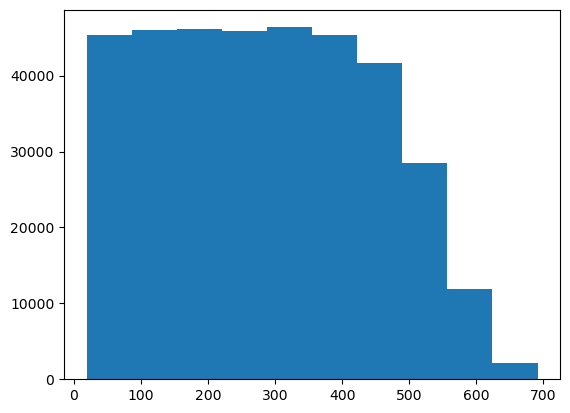

In [27]:
plt.hist(result_df["Cost of Trip"])

# Price Charged
There are a lot of outliers in price charged but we do not have duration nor a clear rate to determine if we need to remove these outliers.  So, the outliers will remain in the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd1a758500>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd1a758a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd1a7582f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd1a758fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd1a759280>],
 'means': []}

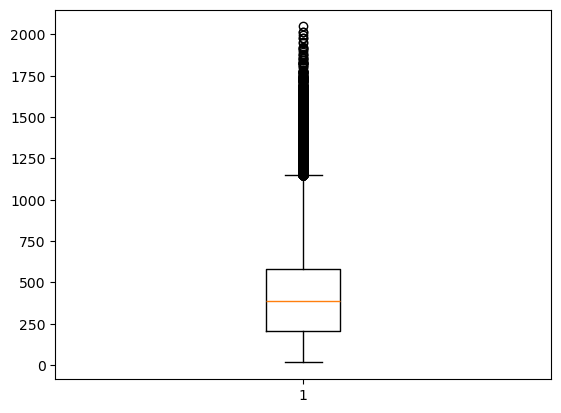

In [28]:
plt.boxplot(result_df["Price Charged"])

(array([9.60940e+04, 1.01072e+05, 8.70330e+04, 4.44660e+04, 1.91790e+04,
        8.06300e+03, 2.72200e+03, 6.30000e+02, 1.12000e+02, 2.10000e+01]),
 array([  15.6  ,  218.843,  422.086,  625.329,  828.572, 1031.815,
        1235.058, 1438.301, 1641.544, 1844.787, 2048.03 ]),
 <BarContainer object of 10 artists>)

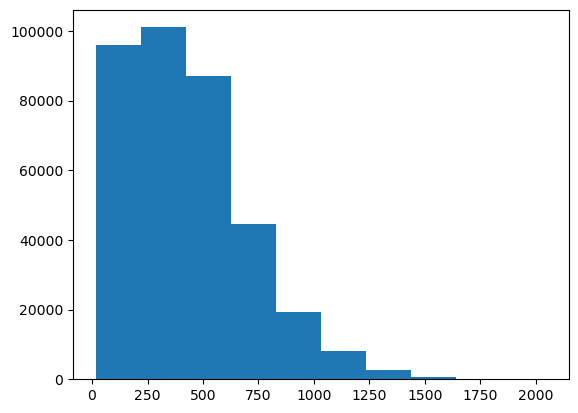

In [29]:
plt.hist(result_df["Price Charged"])

# KM Travelled

There are no outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd1a832a50>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd1a832e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd1a8328a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd1a833290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd1a833530>],
 'means': []}

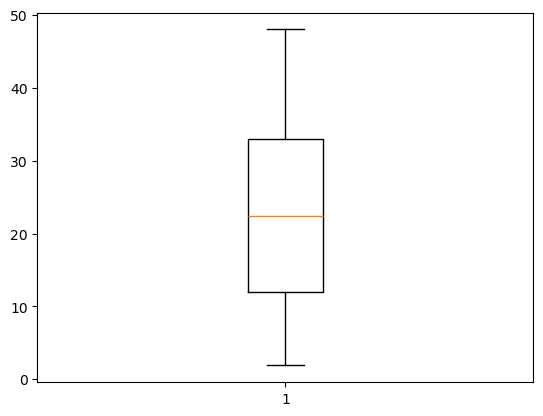

In [30]:
plt.boxplot(result_df["KM Travelled"])

(array([41817., 40537., 39633., 39540., 39330., 40048., 39192., 39776.,
        28777., 10742.]),
 array([ 1.9 ,  6.51, 11.12, 15.73, 20.34, 24.95, 29.56, 34.17, 38.78,
        43.39, 48.  ]),
 <BarContainer object of 10 artists>)

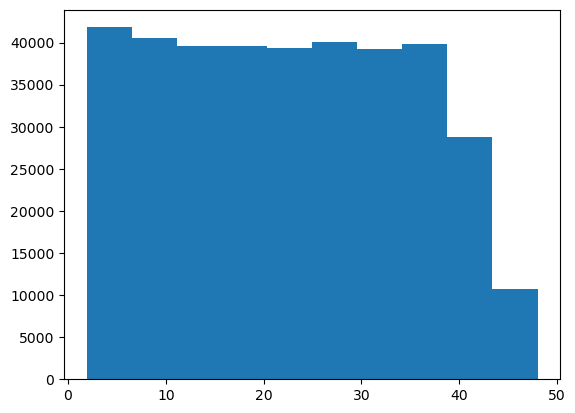

In [31]:
plt.hist(result_df["KM Travelled"])

### Assumptions
1 - There are a lot of outliers in price charged but we do not have duration nor a clear rate to determine if we need to remove these outliers.  So, the outliers will remain in the data.
2 - `User` feature is treated as number of people taking a cab.
3 - Calculated Profit as revenue (`Price_Charged`) minus cost of goods (`Cost of Trip`)

In [32]:
result_df['Profit'] = (result_df["Price Charged"] - result_df["Cost of Trip"]).round(2)
result_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,2016-01-08,814885,24701,29290,Card,Male,28,10813,57.32
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,2016-01-06,814885,24701,27703,Card,Male,27,9237,23.67
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2016-01-02,814885,24701,28712,Cash,Male,53,11242,27.57
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,2016-01-07,814885,24701,28020,Cash,Male,23,23327,25.80
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,2016-01-03,814885,24701,27182,Card,Male,33,8536,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,2018-01-08,418859,127001,52392,Cash,Male,24,15651,5.88
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,2018-01-04,418859,127001,53286,Cash,Male,32,6528,6.90
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,2018-01-05,418859,127001,52265,Cash,Male,56,7966,87.42
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,2018-01-05,418859,127001,52175,Card,Male,32,6423,32.14


In [33]:
result_df['Avg Profit per KM']= (result_df["Profit"] / result_df["KM Travelled"]).round(2)
result_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Avg Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,2016-01-08,814885,24701,29290,Card,Male,28,10813,57.32,1.88
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,2016-01-06,814885,24701,27703,Card,Male,27,9237,23.67,0.83
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2016-01-02,814885,24701,28712,Cash,Male,53,11242,27.57,3.05
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,2016-01-07,814885,24701,28020,Cash,Male,23,23327,25.80,0.78
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,2016-01-03,814885,24701,27182,Card,Male,33,8536,16.84,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,2018-01-08,418859,127001,52392,Cash,Male,24,15651,5.88,1.23
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,2018-01-04,418859,127001,53286,Cash,Male,32,6528,6.90,0.82
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,2018-01-05,418859,127001,52265,Cash,Male,56,7966,87.42,3.15
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,2018-01-05,418859,127001,52175,Card,Male,32,6423,32.14,3.65


### Analysis

Create multiple hypothesis and investigate:
    1   Which company has maximum cab users at a particular time period?
    2   What are the average profit per KM?
    3   Does margin proportionally increase with increase in number of customers?
    4   What are the attributes of these customer segments?
    5   Is there any seasonality in number of customers using the cab service?
    6
    7

In [34]:
result_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [35]:
# Which company has maximum cab users at a particular time period?
""" fig, ax = plt.subplots()
ax.bar(result_df['Company'], result_df['Avg Profit per KM'])  # Assuming 'Route' is your category column
ax.set_xticklabels(result_df['Company'], rotation=45, ha='right')  # Rotate labels for readability
ax.set_ylabel('Avg Profit per KM')
ax.set_title('Average Profit per KM by Route')
plt.tight_layout()
plt.show()
"""


" fig, ax = plt.subplots()\nax.bar(result_df['Company'], result_df['Avg Profit per KM'])  # Assuming 'Route' is your category column\nax.set_xticklabels(result_df['Company'], rotation=45, ha='right')  # Rotate labels for readability\nax.set_ylabel('Avg Profit per KM')\nax.set_title('Average Profit per KM by Route')\nplt.tight_layout()\nplt.show()\n"

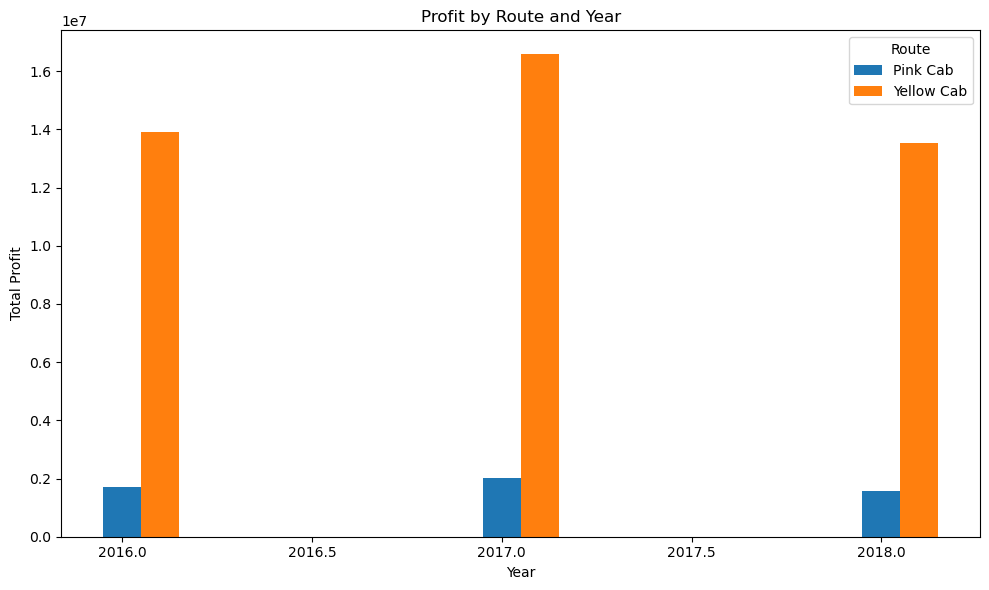

In [36]:
grouped = result_df.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

routes = grouped['Company'].unique()
for route in routes:
    data = grouped[grouped['Company'] == route]
    ax.bar(data['Year'] + 0.1 * list(routes).index(route), data['Profit'], width=0.1, label=route)

ax.set_xlabel('Year')
ax.set_ylabel('Total Profit')
ax.set_title('Profit by Route and Year')
ax.legend(title='Route')
plt.tight_layout()
plt.show()

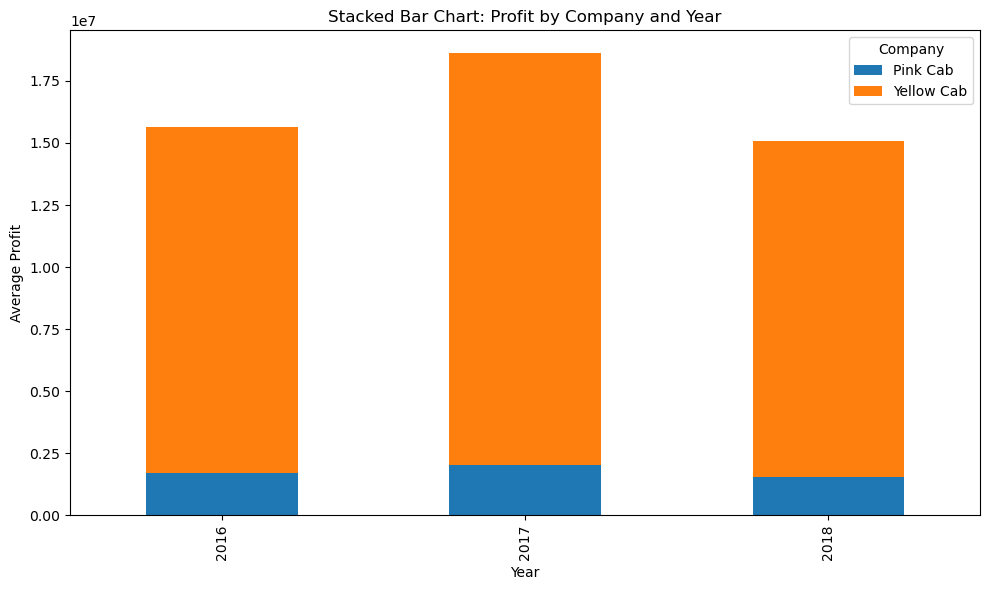

In [ ]:
pivot_df = grouped.pivot(index='Year', columns='Company', values='Profit').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.xlabel('Company')
plt.ylabel('Average Profit')
plt.title('Stacked Bar Chart: Profit by Company and Year')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

